<a href="https://colab.research.google.com/github/Archer001201/Computer-Vision-Project-Overview/blob/main/FaceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os
from google.colab import drive

drive.mount('/content/drive')

base_dir = '/content/drive/My Drive/IAT360/FaceDetectionDataset/images'

data_yaml = f"""
train: {base_dir}/train
val: {base_dir}val

nc: 1
names: ['face']
"""

yaml_path = os.path.join(base_dir, 'data.yaml')
with open(yaml_path, 'w') as f:
    f.write(data_yaml)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


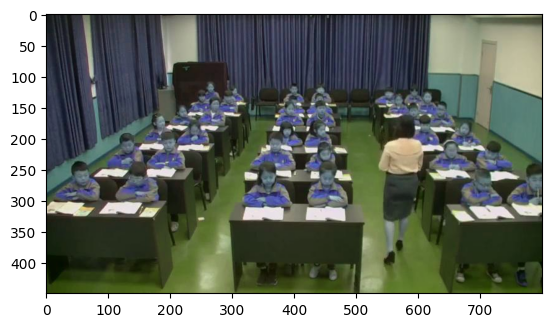

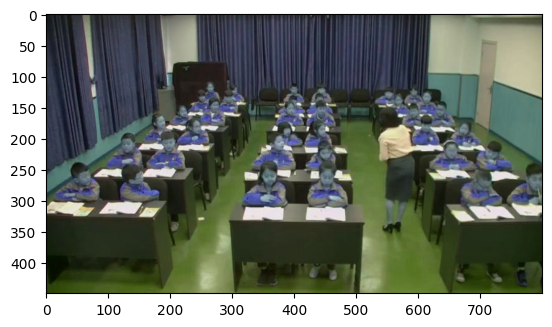

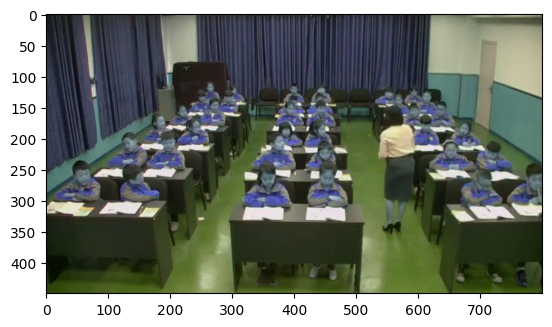

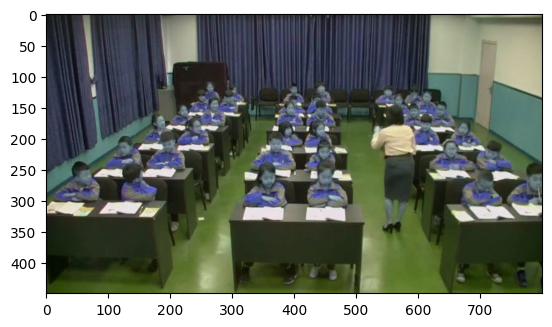

In [31]:
import cv2
import matplotlib.pyplot as plt

#visualize first four sample images from train data
for idx, image in enumerate(os.listdir(os.path.join(base_dir, "train"))):
    img = cv2.imread(os.path.join(base_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [24]:
!pip install comet_ml
import comet_ml

comet_ml.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 697.1/697.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.5/969.5 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 12.1 MB/s eta 0:00:00
  Created wheel for configobj: filename=configobj-5.0.9-py2.py3-none-any.whl size=35615 sha256=4616e7b754d47fadcd4df83268dd783b34a9dd655a86165524d540689fe5c8ba
  Stored in directory: /root/.cache/pip/wheels/a1/6c/03/6c5e3cf1a6e4b9e2fc5c4409be4abc5a8268bd9c878739cb32
Successfully built configobj
  Attempting uninstall: python-box
    Found existing installation: python-box 7.2.0
    Uninstalling python-box-7.2.0:
      Successfully uninstalled python-box-7.2.0


COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /content/drive/MyDrive/.comet.config (set COMET_CONFIG to change where it is saved).


In [4]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/107.7 GB disk)


In [32]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.tune(data="coco8.yaml", epochs=30, iterations=300, optimizer="AdamW", imgsz=640)

model.train(
    data='/content/drive/My Drive/IAT360/FaceDetectionDataset/data.yaml',
     epochs=1
)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/300 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 1/300 iterations complete ✅ (253.70s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.42518 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.89061, 'metrics/recall(B)': 0.38214, 'metrics/mAP50(B)': 0.57016, 'metrics/mAP50-95(B)': 0.40907, 'val/box_loss': 1.64385, 'val/cls_loss':

KeyboardInterrupt: 

In [19]:

metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/My Drive/IAT360/FaceDetectionDataset/labels/val.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/My Drive/IAT360/FaceDetectionDataset/images/val/158.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:37<00:00,  2.87s/it]


                   all        200       6322      0.103      0.974      0.843      0.513
Speed: 1.6ms preprocess, 155.0ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train52


0.9739006643467257

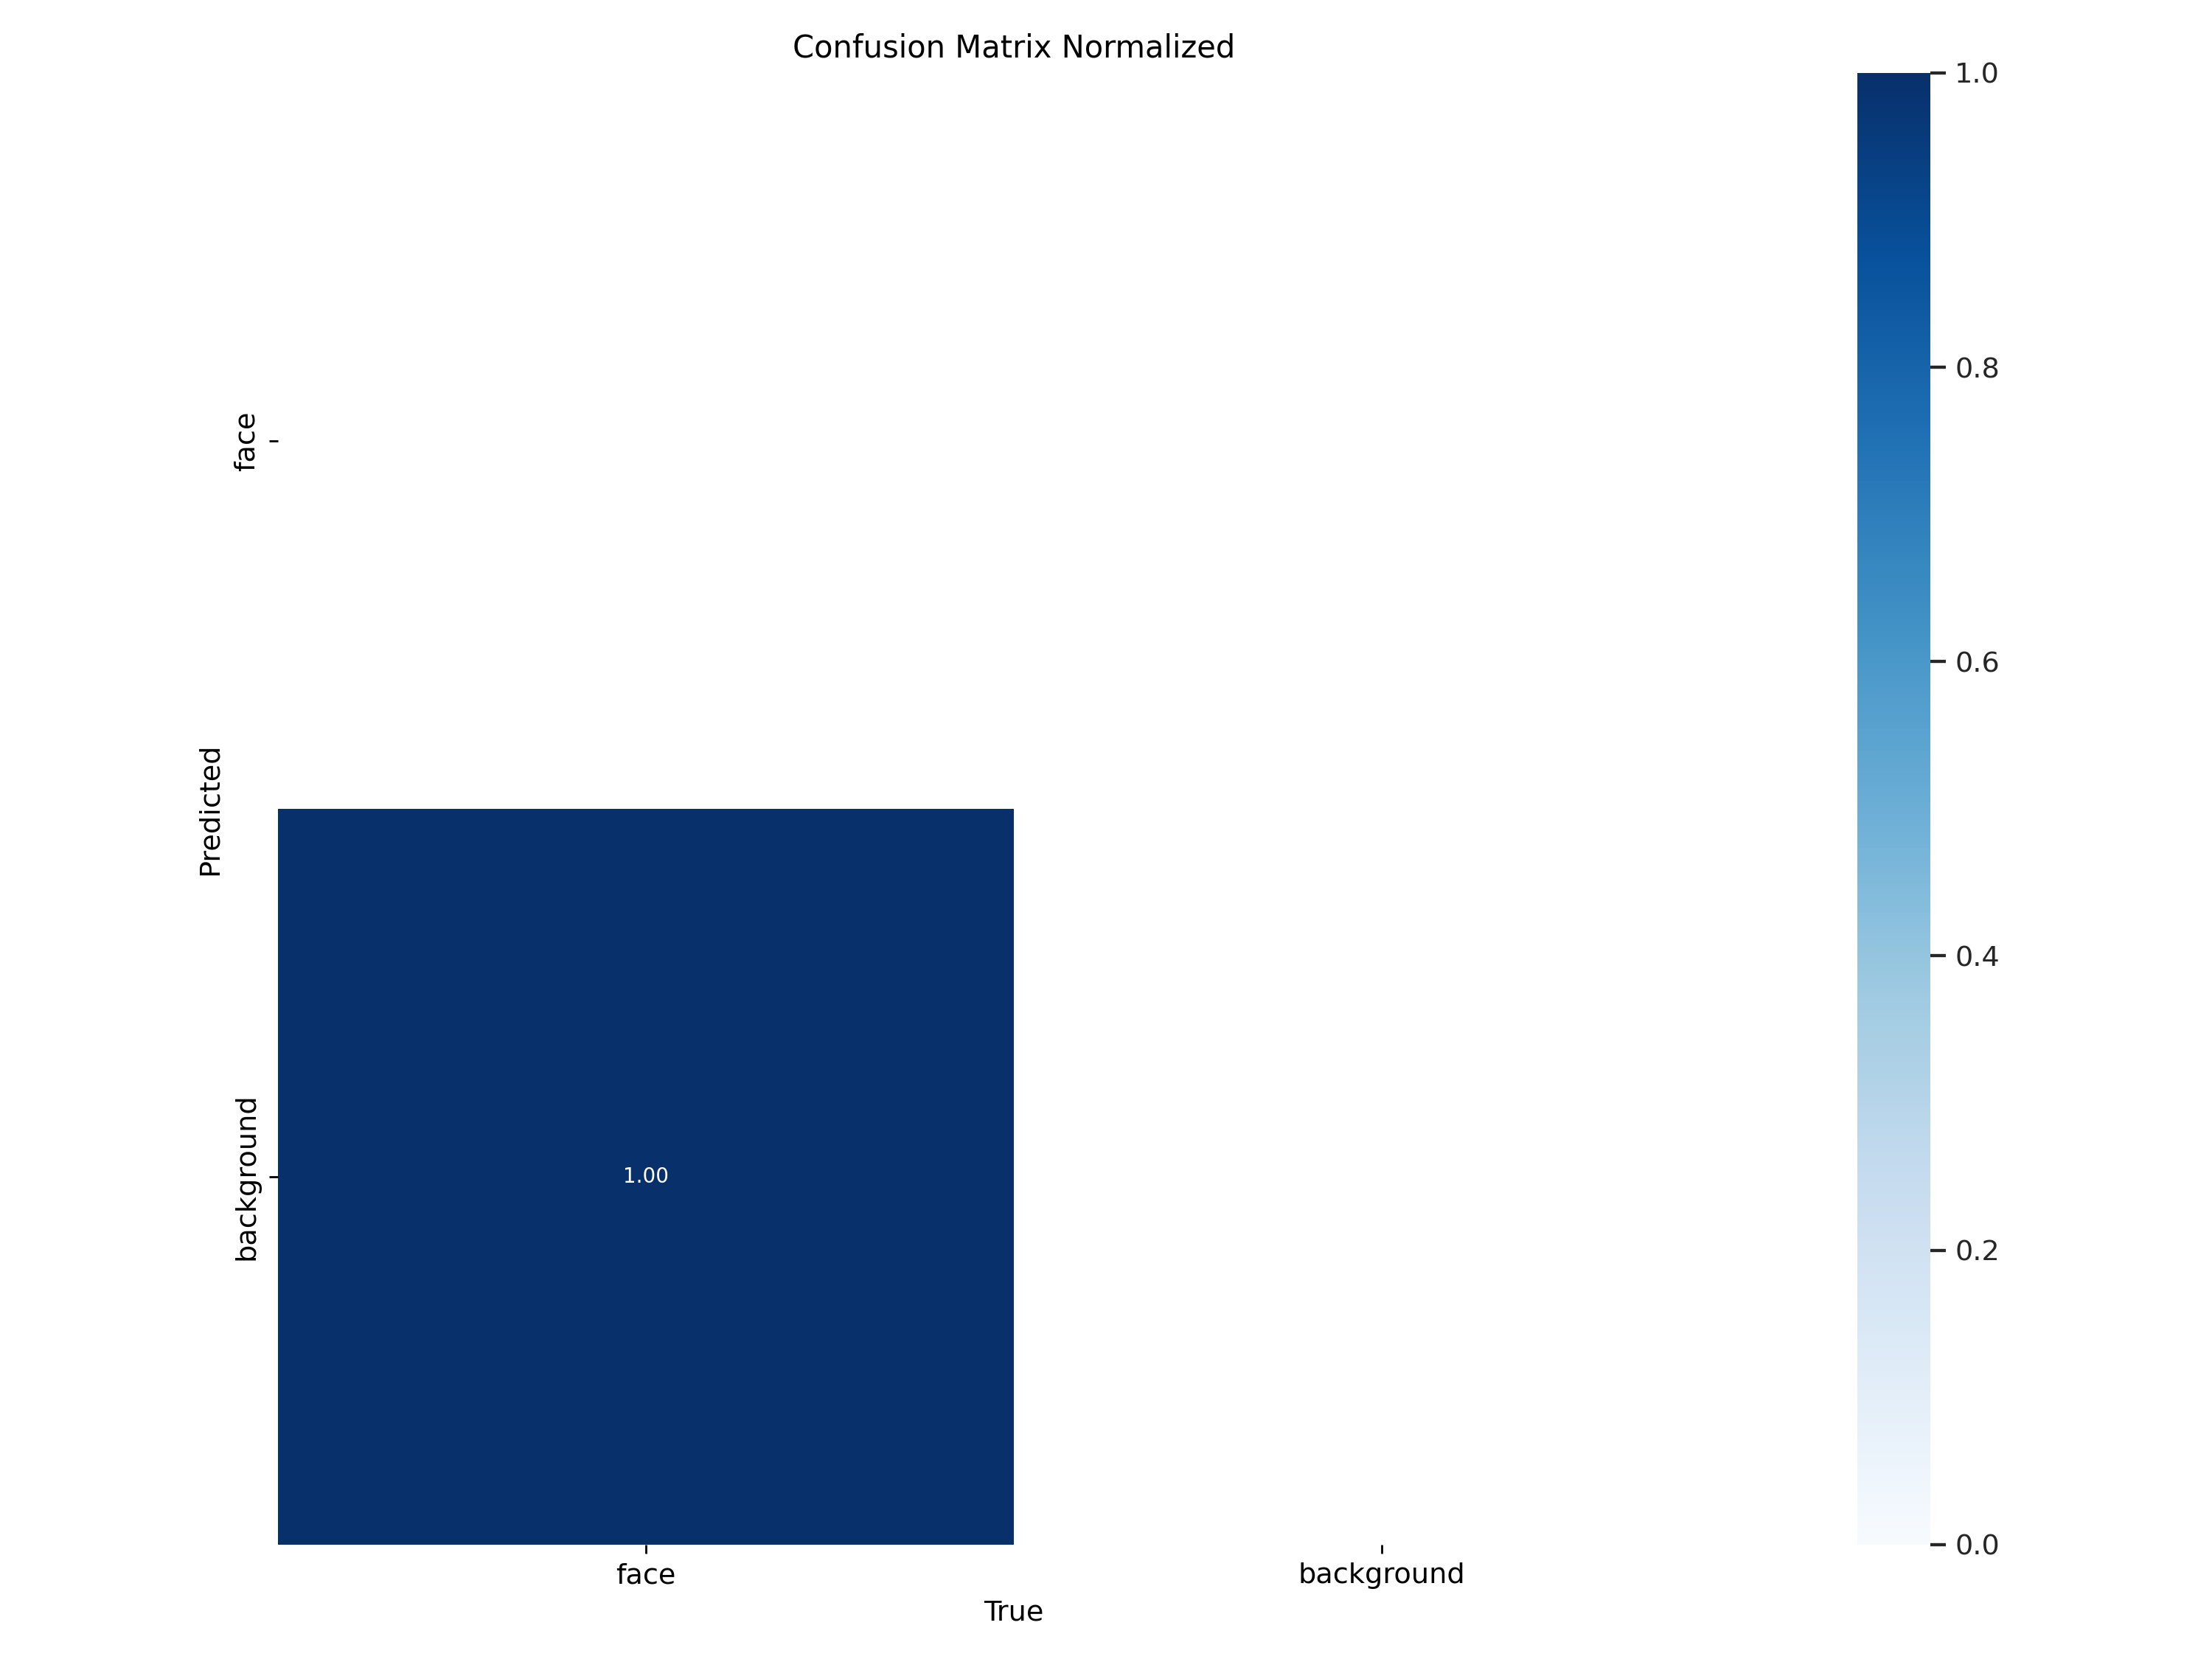

In [20]:

%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train52/confusion_matrix_normalized.png')

  0%|          | 0.00/490k [00:00<?, ?B/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


100%|██████████| 490k/490k [00:00<00:00, 10.5MB/s]

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
image 1/1 /content/9e3540de132b4bbea1ad48467538db33.png: 448x640 7 faces, 321.2ms
Speed: 5.9ms preprocess, 321.2ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
检测到的人脸数量: 7


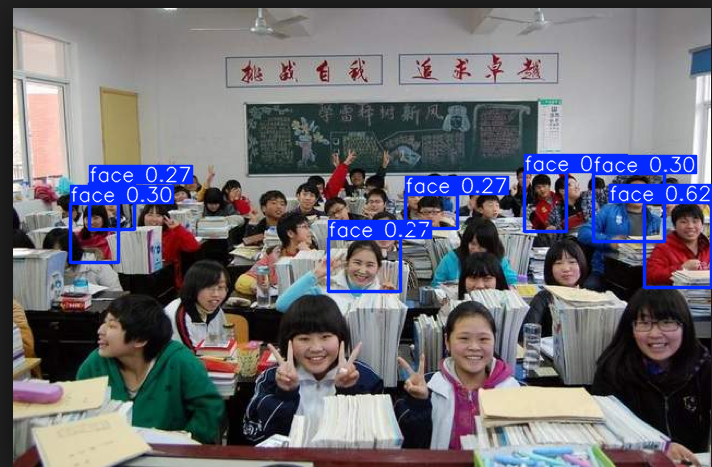

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

imagePath = 'https://i.pinimg.com/originals/9e/35/40/9e3540de132b4bbea1ad48467538db33.png'

results = model.predict(source=imagePath)

face_count = 0
# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show (doesn't work on colab)
    im.save('results.jpg')  # save image
    face_count += len(r.boxes.xyxy)

print("检测到的人脸数量:", face_count)

#show image directly
from google.colab.patches import cv2_imshow
cv2_imshow(im_array)